# Titanic: Machine Learning from Disaster

##### Based on the famous [kaggle Titanic competition](https://www.kaggle.com/c/titanic).

#### Goal: Work through a simple machine learning example from start to finish along a typical data analysis pipeline. 

The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the widely considered "unsinkable" RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren't enough lifeboats for everyone on board, resulting in the death of 1502 of the 2224 passengers and crew. While there was some element of luck involved in surviving, it seems some were more likely to survive than others. We will use machine learning to create a model that predicts which passengers survived the Titanic shipwreck. 

<div align="center">
<img width="1200" title="Titanic at Southampton docks, prior to departure" src="images/titanic.jpg"/>
</div>


**Please note**: This exercise is based on a Jupyter notebook, an interactive environment for writing and running code, and is running in Python. To get familiar with working in Jupyter notebooks, see our "JupyterLab Tutorial". For a short introduction to the basics of programming in Python, see the "Introduction to Python" notebook.

<div class="alert alert-block alert-info">A cell like this indicates a question you need to answer for this Challenge on the U4I platform. Please answer the question <b>before</b> continuing through the notebook.</div>

## Table of contents

[1. Introduction](#1.-Introduction)

[2. Get familiar with the data](#2.-Get-familiar-with-the-data)

[3. Prepare the data](#3.-Prepare-the-data)

   - [3a. Remove some features](#3a.-Remove-some-features)
   - [3b. Replace strings](#3b.-Replace-strings)
   - [3c. Fill in missing data](#3c.-Fill-in-missing-data)
   - [3d. Combine features](#3d.-Combine-features)
   
[4. Visualize the data](#4.-Visualize-the-data)

[5. Create a machine learning model](#5.-Create-a-machine-learning-model)


<mark>@SP Step 4 could be the "Exploratory Analysis" (see Iris). I would not keep data visualization into a separate section, but also use (a few) charts throughout where useful, e.g. while getting familiar with the data and preparing it.</mark>

## 1. Introduction

[[ go back to the top ]](#Table-of-contents)

In this Challenge, you will build a predictive model to answer the question **"Who was more likely to survive on the Titanic?"** using passenger data. These data contains information on each passenger, including, for example, the passenger's name, age, gender, and ticket class. To train the model, we will use a subset of the passenger data (891 of the 2224 passengers and crew on board), which includes the information whether each passenger survived or not--this is our labeled data set `titanic.csv`. 

<mark>Need to adjust next paragraph</mark>

During training, the machine learning algorithm tries to find patterns in the data that link features of each passenger to their survival. Once we have trained our predictive model, we will apply it on a new subset of the passenger data `Titanic_unlabeled.csv` (418 of the passengers and crew on board), which is unlabeled, i.e. does not include passenger survival. Using the provided solution `Titanic_unlabeled_solution.csv`, we will determine the prediction accuracy of the model we developed.

<mark>@SP We should add a short outlook/explanation on the steps we are going to follow: familiarize with the data, clean up the data, visualize the data, create model, (tune model, assess accuracy on the unlabeled data set.</mark>


## 2. Get familiar with the data

[[ go back to the top ]](#Table-of-contents)

Before we start exploring, we need to import some libraries that will help us with our calculations, visualizations, and machine learning models. 

*Remember to press ***Shift+Enter*** to run each code cell.*

In [1]:
# An overview of the libraries used in this notebook is provided in the "Sources" section

# Import data analysis libraries
import pandas as pd
import numpy as np
import random as rnd

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

<mark>@SP: We should only import stuff we actually need (ML libraries), it looks cryptic already :-) </mark> 

Now, let's import our labeled training data set `titanic.csv` and take a look at it:

<mark>@SP: We should not use "data" as a variable to avoid confusion, e.g. "data = data" in seaborn plots => replaced with "titanic_data" </mark> 

In [2]:
# Load data from file into a new object called "titanic_data"
titanic_data = pd.read_csv('titanic.csv')

# Show first 15 rows of data set
titanic_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We can see that each line in the list corresponds to one passenger. These data are a mixture of <b>categorical</b> and <b>numerical</b> features:

`PassengerId`: Unique ID of the passenger\
`Survived`: Survived (1) or died (0)\
`Pclass`: Passenger's class (1st, 2nd, or 3rd)\
`Name`: Passenger's name\
`Sex`: Passenger's sex (male or female)\
`Age`: Passenger's age\
`SibSp`: Number of siblings / spouses aboard the Titanic\
`Parch`: Number of parents / children aboard the Titanic\
`Ticket`: Ticket number\
`Fare`: Fare paid for ticket\
`Cabin`: Cabin number\
`Embarked`: Where the passenger got on the ship (C - Cherbourg, S - Southampton, Q - Queenstown)

From this we can already discern some information about passengers. For example, Braund Owen Harris was a 22-year-old man traveling in 3rd class who did not survive. Note that `NaN` is the abbreviation for "Not a Number". This is how Python represents missing data.

*Hint: You can also take a look at the data set directly by double-clicking on the `csv` file in the File Browser.* 

<div class="alert alert-block alert-info">Pause! Answer <b>Q1 in the Answer.txt file</b>. 
    
Why could missing data ("NaN") be problematic for machine learning models? </div>

Let's now get an overview of some summary statistics about the numerical features of the data set. For numeric data, the output includes the total number of values `count`, the `mean`, the standard deviation `std`, the minimal and maximal values `min` and `max`, as well as the 25, 50 and 75 percentiles. The 50 percentile is the same as the median:

In [3]:
# Show summary statistics of the numerical features in the data set
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<mark>@SP We need here a short comment on what we learn from this, e.g. 38% survived (in this subset), the mean age was about 30 years, but a lot of age data is missing. </mark>

We can also look at the non-numerical, or categorical features of the data set. The output includes several descriptors: `count` and `unique` are the total and unique number of values for a given feature, `top` is the most common value, and `freq` is the frequency of the most common value:

In [4]:
# Show summary statistics of the categorical features in the data set
titanic_data.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hakkarainen, Mr. Pekka Pietari",male,347082,G6,S
freq,1,577,7,4,644


<mark>@SP We need here a short comment on what we learn from this, e.g. more male passengers (in this subset), majority of cabin data is missing. </mark>

As discussed, we can get some useful pieces of information from these tables. Below, we will also **visualize** our data--not only to identify potential issues, but also to improve our understanding of the problem and guide experimentation. So before we move on to preparing the data, let's plot a chart. Remembering that our aim is to find patterns in the data that help us predict whether the passengers survived, let's see how gender correlates with survival. 

<mark>@SP I found out how to export the plot :-) </mark>

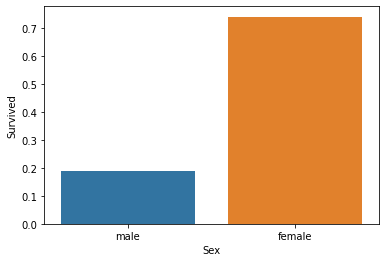

In [5]:
# Show bar plot 
sns.barplot(x='Sex',y='Survived',data=titanic_data,ci=None)

# Save plot as a file
plt.savefig('survival_vs_gender.png')

<mark>@SP The y-axis seems to display the percentage - we should make sure we understand it and add a short comment on that. </mark>


From this you can see that over 70% of the woman passengers survived, but only about 20% of the men. Gender is therefore a strong indicator of survival, and a trivial model using just this one feature for its prediction would likely perform quite well! But we have a lot more data on each passenger than just the gender--by considering multiple features, we should be able detect more complex patterns in the data that will hopefully allow us to improve our predictions. 

## 3. Prepare the data

[[ go back to the top ]](#Table-of-contents)

Before we work with any machine learning models, we need to ensure the data is prepared.

<mark>@SP This feels very abrupt and unclear. What does "prepare" mean? We should explain why we need to tidy the data, what that means; this should motivate why we ask the questions we are asking below. </mark> 

#### 3a. Remove some features

The first step is to <b>remove some features</b> by answering the following questions:

<mark>Comment/motivation needed </mark> 

##### Which features contain blank, null, or empty values?

In [6]:
# Show missing values in data set
column_names = titanic_data.columns
for column in column_names:
    print(column + ': ' + str(titanic_data[column].isnull().sum()))

PassengerId: 0
Survived: 0
Pclass: 0
Name: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Ticket: 0
Fare: 0
Cabin: 687
Embarked: 2


We can see that `Cabin` has the most missing values (687), followed by `Age` (177), and then `Embarked` (2).

##### Which features are mixed data types?
`Ticket` is a mix of numeric and alphanumeric data types. `Cabin` is alphanumeric.

##### Which features may contain errors or typos?
`Name` might contain errors as are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

Therefore, we will remove the features `Ticket`, `Cabin`, and `Name`.

In [7]:
# Remove features Ticket, Cabin, Name from data set
titanic_data = titanic_data.drop(['Ticket', 'Cabin', 'Name'], axis=1)

<div class="alert alert-block alert-info">Pause! Answer <b>Q2 on the U4I platform</b>.
    
Why did we keep PassengerId in the data set? 

*Hint: We want to train a model to predict survival and test our model on a data set that does not include survival.*</div>

<div class="alert alert-block alert-info">Pause! Answer <b>Q3 on the U4I platform</b>.
    
If you could delete another variable or column from the data set, which one would you delete and why?</div>

#### 3b. Replace strings 

Next, we need to <b>replace strings (text or letter sequences) with numbers</b> 

This is because the machine learning algorithms we will use cannot process words. We will replace female with 1, male with 0, S with 0, C with 1, and Q with 2.

Strings replaced


''

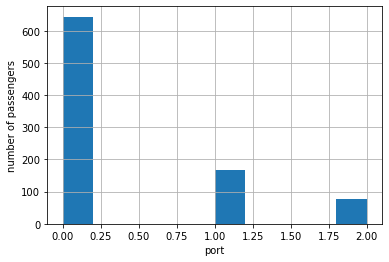

In [8]:
# Replace strings with numbers

titanic_data['Sex'].replace('female', 1,inplace=True)
titanic_data['Sex'].replace('male', 0 ,inplace=True)
titanic_data['Embarked'].replace('S', 0,inplace=True)
titanic_data['Embarked'].replace('C', 1,inplace=True)
titanic_data['Embarked'].replace('Q', 2,inplace=True)

print("Strings replaced")

titanic_data['Embarked'].hist()
plt.xlabel('port')
plt.ylabel('number of passengers')
;


<mark>@SP Running a piece of code that has no output at all always feels weird. Maybe adding any kind of output (see "print" above) helps? Better would be something more meaningful, like a histogram of the features (Sex/Embarked)--ideally formatted a bit nicer :-) </mark> 

#### 3c. Fill in missing data

Finally, we need to deal with in </b>missing data</b>.

Data records are not always complete and this is also true for our data set. Missing data can interfere with machine learning algorithms so we need to <b>fill in the missing data</b>. One way to fill in missing values by using the available values in the data set (e.g., mean or average value, median or middle value, mode or most common value), and approximating a value.

In [9]:
# Supplement missing data in Age with median and Embarked with mode (most common value)

titanic_data['Age'].fillna(titanic_data['Age'].dropna().median(), inplace=True)
freq_port = titanic_data.Embarked.dropna().mode()[0]
titanic_data['Embarked'].fillna(freq_port, inplace=True)

#### 3d. Combine features 

Sometimes it can be useful to <b>combine features into new features</b> for visualizations and calculations.

In [10]:
# Create new data categories for Age and Fare

# Create 5 age groups

titanic_data['AgeBand'] = pd.cut(titanic_data['Age'], 5)
titanic_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
titanic_data.loc[ titanic_data['Age'] <= 16, 'Age'] = 0
titanic_data.loc[(titanic_data['Age'] > 16) & (titanic_data['Age'] <= 32), 'Age'] = 1
titanic_data.loc[(titanic_data['Age'] > 32) & (titanic_data['Age'] <= 48), 'Age'] = 2
titanic_data.loc[(titanic_data['Age'] > 48) & (titanic_data['Age'] <= 64), 'Age'] = 3
titanic_data.loc[ titanic_data['Age'] > 64, 'Age'] = 4
titanic_data = titanic_data.drop(['AgeBand'], axis=1)

# Create 4 fare groups

titanic_data['Fare'].fillna(titanic_data['Fare'].dropna().median(), inplace=True)
titanic_data['FareBand'] = pd.qcut(titanic_data['Fare'], 4)
titanic_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
titanic_data.loc[ titanic_data['Fare'] <= 7.91, 'Fare'] = 0
titanic_data.loc[(titanic_data['Fare'] > 7.91) & (titanic_data['Fare'] <= 14.454), 'Fare'] = 1
titanic_data.loc[(titanic_data['Fare'] > 14.454) & (titanic_data['Fare'] <= 31), 'Fare'] = 2
titanic_data.loc[ titanic_data['Fare'] > 31, 'Fare'] = 3
titanic_data['Fare'] = titanic_data['Fare'].astype(int)
titanic_data = titanic_data.drop(['FareBand'], axis=1)

<div class="alert alert-block alert-info">Pause! Answer <b>Q4 on the U4I platform</b>.
    
Why did we group Age and Fare into groups? Answer: More data per class </div>

<div class="alert alert-block alert-info">Pause! Answer <b>Q5 on the U4I platform (Bonus Question)</b>.
    
The port designations S, C and Q were replaced by 0, 1 and 2. Linear models, such as perceptrons, assume that at a higher variable value the survival probability either increases or decreases. What is the problem with our approach (replacing port designations with 0, 1, and 2)? How can we avoid this problem? Think about how to do it better. </div>

<mark>Save cleaned data into new .csv file and load cleaned data into a new object - see Iris? Would be a cleaner approach </mark> 

In [11]:
# Show first 15 rows of cleaned data set
titanic_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,1.0,1,0,0,0.0
1,2,1,1,1,2.0,1,0,3,1.0
2,3,1,3,1,1.0,0,0,1,0.0
3,4,1,1,1,2.0,1,0,3,0.0
4,5,0,3,0,2.0,0,0,1,0.0
5,6,0,3,0,1.0,0,0,1,2.0
6,7,0,1,0,3.0,0,0,3,0.0
7,8,0,3,0,0.0,3,1,2,0.0
8,9,1,3,1,1.0,0,2,1,0.0
9,10,1,2,1,0.0,1,0,2,1.0


## 4. Visualize the data

[[ go back to the top ]](#Table-of-contents)

Visualizing data is a great way to gain some insights and see some trends before applying any machine learning models.

Because we want to predict survival, it makes sense to visualize the relationship between some of the factors and survival.

### Class vs. Survival

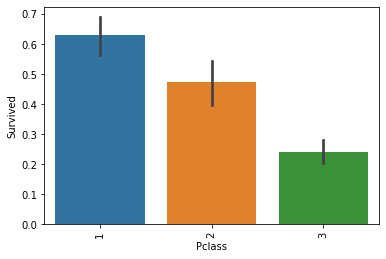

In [12]:
titanic_data.groupby('Pclass').Survived.mean().plot(kind='bar')
sns.barplot(x='Pclass', y='Survived', data=titanic_data)
plt.show()

### Sex vs. Survival

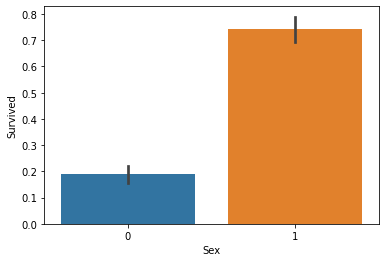

In [13]:
#titanic_data.groupby('Sex').Survived.mean().plot(kind='bar')
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.show()

### Class and Sex  vs. Survival

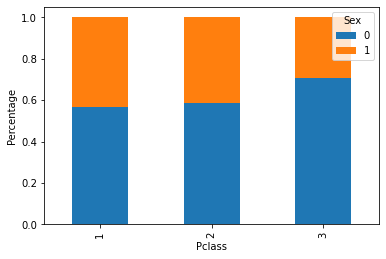

In [14]:
tab = pd.crosstab(titanic_data['Pclass'], titanic_data['Sex'])
tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Pclass')
plt.ylabel('Percentage')
plt.show()

### Embarked vs. Survival

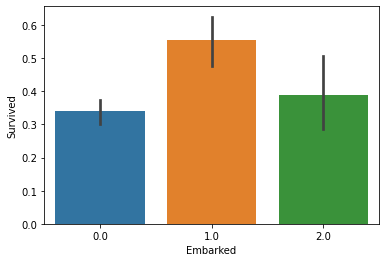

In [15]:
#titanic_data.groupby('Embarked').Survived.mean().plot(kind='bar')
sns.barplot(x='Embarked', y='Survived', data=titanic_data)
plt.show()

### Embarked, Class, and Sex vs. Survival

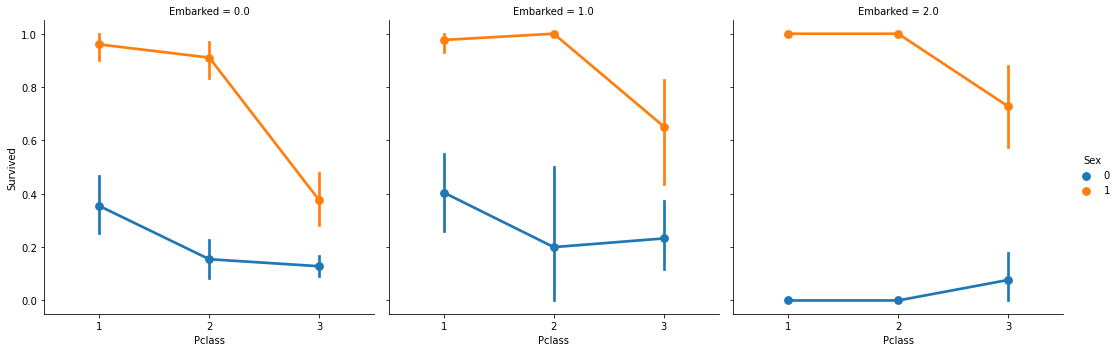

In [16]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=titanic_data)
plt.show()

### Age vs. Survival

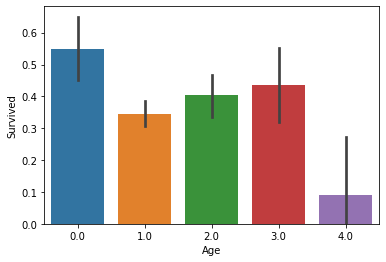

In [17]:
#titanic_data.groupby('Age').Survived.mean().plot(kind='bar')
sns.barplot(x='Age', y='Survived', data=titanic_data)
plt.show()

### Age and Embarked vs. Survival

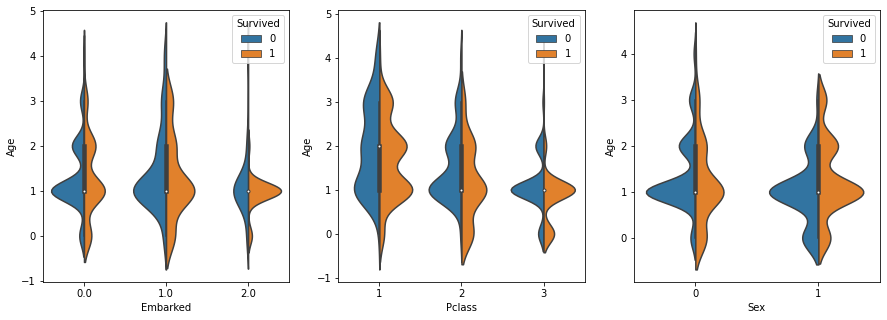

In [18]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x="Embarked", y="Age", hue="Survived", data=titanic_data, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=titanic_data, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=titanic_data, split=True, ax=ax3)

plt.show()

<mark>#HF how many more visualizations do we need/should we have. Either way I think at the end of this section we should have a Q that asks the users to use the visualizations to make some conclusions as to what affects survival. This can be a basis for how to improve the model in the last question. </mark> 

## 5. Create a machine learning model

[[ go back to the top ]](#Table-of-contents)


<mark>WIP below</mark> 

The goal of a machine learning model is to make accurate predictions on new, previously unseen data. If we are building a model using the data set that contains what we want to predict, we need to divide the data set into two:

- A <b>training</b> subset to train a model, which contains the information we are trying to predict 
- A <b>test</b> subset to test the model, which does not contain the information we are trying to predict

In [35]:
# Separate the data into training set and test set
train_df, test_df = train_test_split(titanic_data, test_size=0.3)

Next, we need to separate survival, the outcome, from rest of the factors in the data set.

In [20]:
# Divide each data set (training and test) into two parts: X & Y

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.drop("Survived", axis=1)
Y_test = test_df["Survived"]

Now we can train a model. 
There are numerous predictive modeling algorithms but not all apply to our problem. Our problem is a classification and regression problem: we want to identify the relationship between passenger survival with other features (e.g., sex, age, class). We are also perfoming a category of machine learning called supervised learning as we are training our model with a given data set. Given this, we will take a closer look at 3(4?) algorithms:

### Logistic regression

Logistic regression is a useful early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (in our case, Survival) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. 

Source: https://en.wikipedia.org/wiki/Logistic_regression

In [36]:
# Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_test, Y_test) * 100, 2)
acc_log

78.36

We can use Logistic Regression to confirm our assumptions by calculating the coefficient of the features in the function.\
Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

In [37]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Sex,2.576101
6,Fare,0.386902
7,Embarked,0.338292
0,Survived,0.000132
5,Parch,-0.163358
4,SibSp,-0.420300
3,Age,-0.573555
1,Pclass,-0.659536


<b>Sex is highest positive coefficient</b>, implying that as the Sex value increases (male = 0 to female = 1), the probability of Survived = 1 increases the most.\
<b>Pclass is the highest negative coefficient</b>, implying that as class increases (1-3), probability of Survived = 1 decreases the most.

### Decision tree classifier

The decision tree classifier maps features (tree branches) to conclusions about the target value (tree leaves, in our case, Survival). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. 

Source: https://en.wikipedia.org/wiki/Decision_tree

In [38]:
# Decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

75.37

In [39]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

77.61

### K-nearest neighbors classifier (K-NN)

The K-NN classifier is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor. 

Source:https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [46]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

53.73

Now, we will see how well the chosen model predicts our data.\
The function scoretakes the values of the test data set (X_test), calculates with the model the corresponding values for the survival status, and compares them with the correct values (Y_test). The output value `acc_logof` is the probability that the model predicted survival status correctly.

In [41]:
# Validate model and calculate accuracy

acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

print("The accuracy of the model with respect to the test data is:")
print(acc_log)

The accuracy of the model with respect to the test data is:
78.36


<div class="alert alert-block alert-info">Pause! Answer <b>Q6 on the U4I platform (Bonus Question)</b>.
    
Run any of machine learning algorithm several rimes in a row (without changing the code). Why do you get a different accuracy each time? More here?</div>

### Congratulations! You have completed the Titanic Challenge! Remember to submit the exercise on the U4I platform.

## Sources:

[[ go back to the top ]](#Table-of-contents)

- https://www.kaggle.com/c/titanic
- https://www.kaggle.com/startupsci/titanic-data-science-solutions

Sources for pictures:
- Titanic.jpg: https://upload.wikimedia.org/wikipedia/commons/9/92/Titanic.jpg

### Python packages used

<mark>To be updated/completed</mark>

This notebook uses several standard Python packages. These are:

* **pandas**: Provides the "DataFrame" structure to store data in memory and work with it easily and efficiently. DataFrame is a 2-dimensional labeled data structure with columns of potentially different types; you can think of it like a spreadsheet.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **seaborn**: Advanced statistical plotting library.
* **scikit-learn**: The essential Machine Learning package in Python.
* **numpy**: Provides a fast numerical array structure and helper functions.

## <mark>===Internal notes section, to be removed in final Challenge===</mark>

### <mark> Check code </mark>

### <mark> Ressources to explore </mark>

- https://www.kaggle.com/alexisbcook/titanic-tutorial
- Grouped barplot (Titanic example): https://seaborn.pydata.org/examples/grouped_barplot.html

### <mark> User interactivity </mark>

- Answering questions: Text fields?

- Ask user to write some/any code, e.g. "data = pd.read_csv('<file name here>')"? Trivial, but might add to the feeling that you're doing sth. yourself


### <mark> Approaches to improve the accuracy of the model </mark>

Learn more about the data > improve understanding > guide experimentation:

- Feature engineering: Design / create some new features
- try different types of preprocessing (different methods to fill in missing values)
- try different types of ML models, then combine / ensemble them
- Learn from other's code

### <mark>Answers to Questions - WIP </mark>

- Q1

- Q2

- Q3

- Q4

- Q5

- Q6
